In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

import os
import skimage
import random

print(tf.__version__)

2.0.0-beta1


In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".png")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(d)
    for i in range(len(images)):
        images[i] = images[i]/255
    c = list(zip(images, labels))
    random.shuffle(c)
    images, labels = zip(*c)
    labels= [int(i) for i in labels]
    
    images_train = np.array(images)
    labels_train = np.array(labels)
    
    return images_train, labels_train

ROOT_PATH = "C:/Users/Didi/Desktop/T-Systems"
train_data_directory = os.path.join(ROOT_PATH, "TestGray")

In [3]:
images_train, labels_train = load_data(train_data_directory)

In [4]:
model01 = keras.Sequential([
    keras.layers.Conv2D(input_shape=(100, 150, 1), kernel_size = (5, 5), filters = 32, activation='relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Conv2D(kernel_size = (5, 5), filters = 64, activation='relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Conv2D(kernel_size = (5, 5), filters = 128, activation='relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Conv2D(kernel_size = (5, 5), filters = 256, activation='relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    #keras.layers.Conv2D(kernel_size = (3, 3), filters = 512, activation='relu'),
    #keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
])
model01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 146, 32)       832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 34, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 30, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 15, 128)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 11, 256)        8

In [5]:
model01.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [6]:
images_train = images_train.reshape(-1, 100, 150, 1)

In [7]:
filepath="Model01_save/Epoch-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, save_weights_only=False, mode='max')
callbacks_list = [checkpoint]

In [8]:
history = model01.fit(images_train, labels_train, epochs=70, callbacks=callbacks_list, validation_split=0.2)

W0713 11:15:53.217937  7860 deprecation.py:323] From C:\Users\Didi\Anaconda3\envs\your_env_name\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/70
47968/48000 [============================>.] - ETA: 0s - loss: 0.4867 - accuracy: 0.7960
Epoch 00001: saving model to Model01_save/Epoch-01-0.96.h5
48000/48000 [==============================] - 146s 3ms/sample - loss: 0.4864 - accuracy: 0.7961 - val_loss: 0.1197 - val_accuracy: 0.9600
Epoch 2/70
47968/48000 [============================>.] - ETA: 0s - loss: 0.0743 - accuracy: 0.9769
Epoch 00002: saving model to Model01_save/Epoch-02-0.99.h5
48000/48000 [==============================] - 139s 3ms/sample - loss: 0.0744 - accuracy: 0.9769 - val_loss: 0.0421 - val_accuracy: 0.9882
Epoch 3/70
47968/48000 [============================>.] - ETA: 0s - loss: 0.0538 - accuracy: 0.9835
Epoch 00003: saving model to Model01_save/Epoch-03-0.99.h5
48000/48000 [==============================] - 138s 3ms/sample - loss: 0.0537 - accuracy: 0.9835 - val_loss: 0.0331 - val_accuracy: 0.9905
Epoch 4/70
47968/48000 [============================>.] 

47968/48000 [============================>.] - ETA: 0s - loss: 13.4193 - accuracy: 0.1674
Epoch 00055: saving model to Model01_save/Epoch-55-0.17.h5
48000/48000 [==============================] - 137s 3ms/sample - loss: 13.4190 - accuracy: 0.1674 - val_loss: 13.4197 - val_accuracy: 0.1674
Epoch 56/70
47968/48000 [============================>.] - ETA: 0s - loss: 13.4347 - accuracy: 0.1665
Epoch 00056: saving model to Model01_save/Epoch-56-0.17.h5
48000/48000 [==============================] - 137s 3ms/sample - loss: 13.4348 - accuracy: 0.1665 - val_loss: 13.4197 - val_accuracy: 0.1674
Epoch 57/70
47968/48000 [============================>.] - ETA: 0s - loss: 13.4340 - accuracy: 0.1665
Epoch 00057: saving model to Model01_save/Epoch-57-0.17.h5
48000/48000 [==============================] - 137s 3ms/sample - loss: 13.4348 - accuracy: 0.1665 - val_loss: 13.4197 - val_accuracy: 0.1674
Epoch 58/70
47968/48000 [============================>.] - ETA: 0s - loss: 13.4353 - accuracy: 0.1664
Epoc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


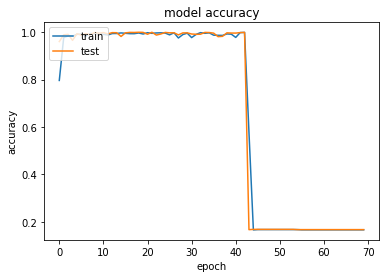

In [9]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [3]:
images_train, labels_train = load_data(train_data_directory)

In [4]:
model02 = keras.Sequential([
    keras.layers.Conv2D(input_shape=(100, 150, 1), kernel_size = (5, 5), filters = 64, activation='relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Conv2D(kernel_size = (5, 5), filters = 128, activation='relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Conv2D(kernel_size = (5, 5), filters = 256, activation='relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Conv2D(kernel_size = (3, 3), filters = 512, activation='relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    #keras.layers.Conv2D(kernel_size = (3, 3), filters = 512, activation='relu'),
    #keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
])
model02.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 146, 64)       1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 69, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 34, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 30, 256)       819456    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 15, 256)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 13, 512)        1

In [5]:
model02.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [6]:
images_train = images_train.reshape(-1, 100, 150, 1)

In [7]:
filepath="Model03_save/Epoch-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, save_weights_only=False, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = model02.fit(images_train, labels_train, epochs=70, callbacks=callbacks_list, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/70
47968/48000 [============================>.] - ETA: 0s - loss: 0.3245 - accuracy: 0.8684
Epoch 00001: saving model to Model03_save/Epoch-01-0.98.h5
48000/48000 [==============================] - 267s 6ms/sample - loss: 0.3243 - accuracy: 0.8685 - val_loss: 0.0656 - val_accuracy: 0.9778
Epoch 2/70
 1792/48000 [>.............................] - ETA: 3:55 - loss: 0.0432 - accuracy: 0.9883

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()